## USE THE CODE FROM: https://github.com/HHHit/DL-based-Tumor-Classification/blob/master/model/utils/show_result.py

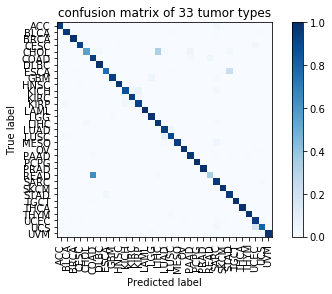

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score


predicted_label = []
true_label = []
output_path = './'
for i in range(0,10):
    predicted_label_path = './img_fold' + str(i) + '/test/predicted_label_run_th1.csv'
    true_label_path = './img_fold' + str(i) + '/test/test_label_run_th1.csv'
    predicted_label_tmp = np.array(pd.read_csv(predicted_label_path, header=None)) + 1.0
    true_label_tmp = np.array(pd.read_csv(true_label_path, header=None)) + 1.0
    predicted_label.append(predicted_label_tmp)
    true_label.append(true_label_tmp)

true_label_all = np.concatenate(true_label, axis=0)
predicted_label_all = np.concatenate(predicted_label, axis=0)


def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]
    classes = ['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC',
               'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
               'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM']
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('confusion matrix of 33 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label_all,true_label_all)
precison_s = precision_score(true_label_all, predicted_label_all, average='weighted')
recall_s = recall_score(true_label_all, predicted_label_all, average='weighted')
f1 = f1_score(true_label_all, predicted_label_all, average='weighted')
accuracy = accuracy_score(true_label_all, predicted_label_all)
accuracy_each_class = cnf_matrix.diagonal()

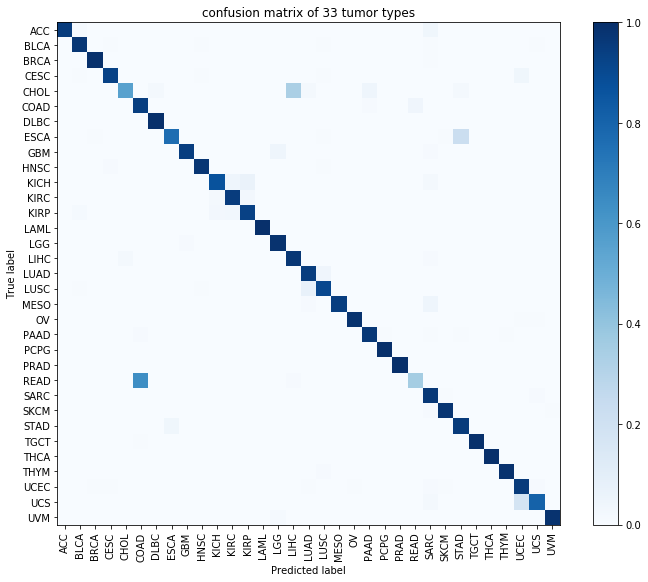

In [32]:
classes = ['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC',
           'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
           'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM']

def draw_confusion_matrix(predicted_label_all,true_label_all):
    # predicted_label = np.array(pd.read_csv(predicted_label_path, header=None)).astype(np.int)
    # true_label = np.array(pd.read_csv(true_label_path, header=None)).astype(np.int)
    cnf_matrix = confusion_matrix(true_label_all, predicted_label_all)
    cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('confusion matrix of 33 tumor types')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cnf_matrix


cnf_matrix = draw_confusion_matrix(predicted_label_all,true_label_all)
precison_s = precision_score(true_label_all, predicted_label_all, average='weighted')
recall_s = recall_score(true_label_all, predicted_label_all, average='weighted')
f1 = f1_score(true_label_all, predicted_label_all, average='weighted')
accuracy = accuracy_score(true_label_all, predicted_label_all)
accuracy_each_class = cnf_matrix.diagonal()

In [35]:
accuracy_each_class

array([0.94936709, 0.96955504, 0.99422442, 0.92880259, 0.55555556,
       0.94512195, 1.        , 0.76530612, 0.94152047, 0.97526502,
       0.86813187, 0.95214521, 0.93188854, 1.        , 0.98490566,
       0.96926714, 0.94791667, 0.9076087 , 0.94252874, 0.98697068,
       0.96721311, 1.        , 1.        , 0.35238095, 0.96603774,
       0.97885835, 0.95555556, 0.99358974, 1.        , 0.99180328,
       0.95522388, 0.80701754, 0.9875    ])